In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [9]:
class Particle:
    def __init__(self, loc):
        self.loc = loc
        self.cluster = False # tracks whether particle is n cluster
        self.domain = True # tracks whether particle is still in domain

def move(particle, particles, n):
    cluster_loc = {tuple(part.loc) for part in particles if part.cluster}
    x, y = particle.loc
    neighbors = ((x+1, y), (x-1, y), (x, y+1), (x, y-1))

    if particle.cluster:
        return 'Particle is in the cluster and cannot move'
    
    elif not particle.domain:
        return 'Particle left the domain'

    elif any(neighbor in cluster_loc for neighbor in neighbors):
        particle.cluster = True

    else:
        direction = ['n', 'e', 's', 'w']
        idx = np.random.randint(0,4)

        # going up
        if direction[idx] == 'n': 
            if particle.loc[0] == 0:
                particle.domain = False
                particles.remove(particle)
            else:
                particle.loc = [particle.loc[0] - 1, particle.loc[1]]

        # going right
        elif direction[idx] == 'e':
            if particle.loc[1] == n - 1:
                particle.loc = [particle.loc[0], 0]  # periodic boundary
            else:
                particle.loc = [particle.loc[0], particle.loc[1] + 1]

        # going down
        elif direction[idx] == 's':
            if particle.loc[0] == n - 1:
                particle.domain = False
                particles.remove(particle)
            else:
                particle.loc = [particle.loc[0] + 1, particle.loc[1]]

        # going left
        elif direction[idx] == 'w':
            if particle.loc[1] == 0:
                particle.loc = [particle.loc[0], n - 1]  # periodic boundary
            else:
                particle.loc = [particle.loc[0], particle.loc[1] - 1]

    return particle

def travel(particle, particles, n):

    while particle.domain and not particle.cluster:
        move(particle, particles, n)

def gen_particle(particles, n):

    y = np.random.randint(0, n)
    part = Particle([0, y])
    particles.append(part)
    
    return part

def next_step(particles, n):
    global domain
    domain.fill(0)

    moving_particle = [part for part in particles if not part.cluster and part.domain]
    
    if not moving_particle: # if there are no particule in motion
        particle = gen_particle(particles, n)
    else:
        particle = moving_particle[0]

    move(particle, particles, n)

    for part in particles:
        domain[part.loc[0], part.loc[1]] = 1


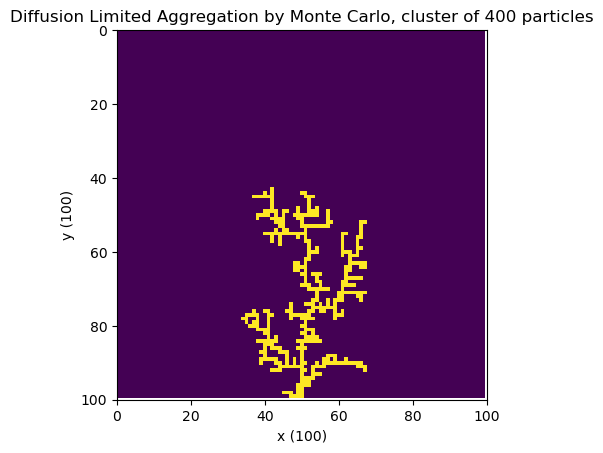

In [11]:
n = 100 # size of domain (once squared)
N = 400 # desired size of cluster
domain = np.zeros((n, n))
initial_cluster = Particle([n-1, n//2]) #cluster starts at the bottom/middle of the grid
particles = [initial_cluster]
initial_cluster.cluster = True
cluster_l = []

while len(cluster_l)<N:
    part = gen_particle(particles, n)
    travel(part, particles, n)
    cluster_l = [tuple(part.loc) for part in particles if part.cluster]


for part in particles:
    domain[part.loc[0], part.loc[1]] = 1
    
im = plt.imshow(domain)
plt.xlabel(f"x ({n})")
plt.ylabel(f"y ({n})")
plt.title(fr"Diffusion Limited Aggregation by Monte Carlo, cluster of {N} particles")
plt.xlim(0, n)
plt.ylim(n, 0)
#plt.savefig("dla_set2_2B_MC.png", dpi = 300)
plt.show()

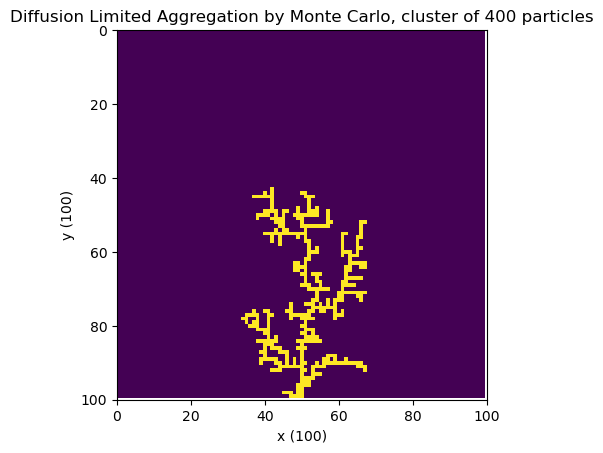

In [ ]:
im = plt.imshow(domain)
plt.xlabel(f"x ({n})")
plt.ylabel(f"y ({n})")
plt.title(fr"Diffusion Limited Aggregation by Monte Carlo, cluster of {N} particles")
plt.xlim(0, n)
plt.ylim(n, 0)
#plt.savefig("dla_set2_2B_MC.png", dpi = 300)
plt.show()